In [2]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 6.2 MB/s 
     |████████████████████████████████| 9.8 MB 60.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=0605f2e30905ccb25b1f75bb5fe02b839973d76ac815787284ef8d0abdeba9b4
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d766ac6d8d54e7f4c9405aee85065f16f78af10f59c973728b3f617dacc09797
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [38]:
LevodopaChallengeAllTimePoints = pd.read_csv('LevodopaChallengeAllTimePoints.csv', sep = ';')

In [39]:
LevodopaChallengeAllTimePoints

,patient,Speed (m/s),Cadence (steps/min),Step Time - worst side (s)2,Step Length - worst side (m)2,Stride Time (s),Stride Length (m),Step Width (m),Stance Time - worst time t (s)2,Swing Time - worst side (s)2,...,Cv Step Width,CV Stride Time,Cv Stride Lenght,CV Double Support,CV Stance Fraction,Step Time Asymetry N,Step lenght AsymetryN,Stance Time Asymetry N,Swing Time Asymetry N,Group
0,A1,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,...,0.173002,0.034927,0.133088,0.064845,0.025515,0.005713,0.106101,0.023141,0.052408,OFF
1,B2,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,...,0.443050,0.076291,0.309330,0.162151,0.051773,0.107760,0.252853,0.081588,0.186011,OFF
2,C3,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,...,0.403884,0.102456,0.226720,0.177430,0.031323,0.044568,0.063652,0.021642,0.045373,OFF
3,D4,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,...,0.329662,0.024560,0.127313,0.105754,0.016734,0.077761,0.209073,0.029428,0.059760,OFF
4,E5,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,...,0.181974,0.406887,0.095313,0.106603,0.027155,0.383606,0.047893,0.185206,0.331235,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M13,0.675777,105.494506,0.601471,0.399731,1.137766,0.800632,0.325380,0.747505,0.390261,...,0.261770,0.083390,0.275369,0.211724,0.053054,0.112768,0.104086,0.051326,0.106259,80min
81,N14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80min
82,O15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80min
83,P16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80min


In [40]:
LevodopaChallengeAllTimePoints.dtypes

patient                              object
Speed (m/s)                         float64
Cadence (steps/min)                 float64
Step Time - worst side (s)2         float64
Step Length - worst side (m)2       float64
Stride Time (s)                     float64
Stride Length (m)                   float64
Step Width (m)                      float64
Stance Time - worst time t (s)2     float64
Swing Time - worst side (s)2        float64
Double Support Time (s)             float64
Single Support Time - worst side    float64
hip_flexion_rom_worstside           float64
hip_adduction_rom_worstside         float64
hip_rotation_rom_worstside          float64
knee_angle_rom_worstside            float64
ankle_angle_rom_worstside           float64
hip_flexion_mean_vel_worstside      float64
hip_adduction_mean_vel_worstside    float64
hip_rotation_mean_vel_worstside     float64
knee_angle_r_mean_vel_worstside     float64
ankle_angle_mean_vel_worstside      float64
arm_flex_rom_worstside          

In [41]:
LevodopaChallengeAllTimePoints.isnull().sum()

patient                              0
Speed (m/s)                         13
Cadence (steps/min)                 13
Step Time - worst side (s)2         13
Step Length - worst side (m)2       13
Stride Time (s)                     13
Stride Length (m)                   13
Step Width (m)                      13
Stance Time - worst time t (s)2     13
Swing Time - worst side (s)2        13
Double Support Time (s)             13
Single Support Time - worst side    13
hip_flexion_rom_worstside           13
hip_adduction_rom_worstside         13
hip_rotation_rom_worstside          13
knee_angle_rom_worstside            13
ankle_angle_rom_worstside           13
hip_flexion_mean_vel_worstside      13
hip_adduction_mean_vel_worstside    13
hip_rotation_mean_vel_worstside     13
knee_angle_r_mean_vel_worstside     13
ankle_angle_mean_vel_worstside      13
arm_flex_rom_worstside              17
arm_add_rom_worstside               17
elbow_flex_rom_worstside            17
arm_rot_rom_worstside    

In [42]:
LevodopaChallengeAllTimePoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient                           85 non-null     object 
 1   Speed (m/s)                       72 non-null     float64
 2   Cadence (steps/min)               72 non-null     float64
 3   Step Time - worst side (s)2       72 non-null     float64
 4   Step Length - worst side (m)2     72 non-null     float64
 5   Stride Time (s)                   72 non-null     float64
 6   Stride Length (m)                 72 non-null     float64
 7   Step Width (m)                    72 non-null     float64
 8   Stance Time - worst time t (s)2   72 non-null     float64
 9   Swing Time - worst side (s)2      72 non-null     float64
 10  Double Support Time (s)           72 non-null     float64
 11  Single Support Time - worst side  72 non-null     float64
 12  hip_flexio

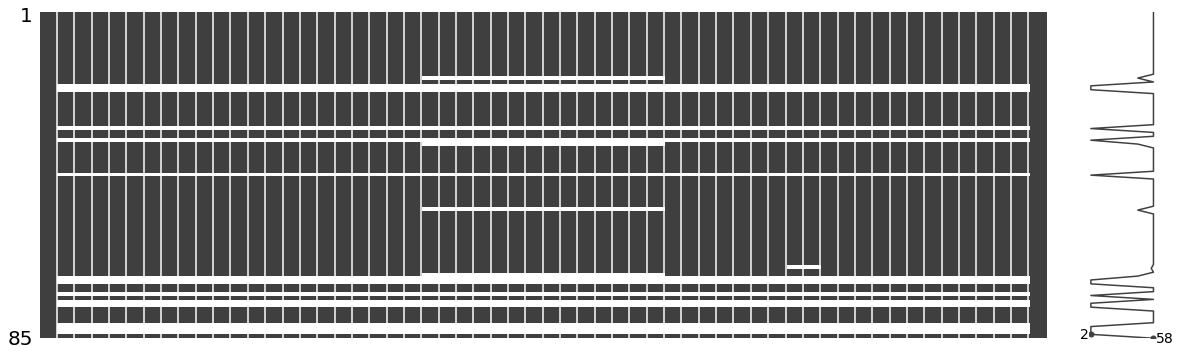

In [43]:
mno.matrix(LevodopaChallengeAllTimePoints,figsize = (20,6))

In [44]:
# Remove patient index

patid_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,0:1]

In [45]:
# Remove condition label

condition_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,57:58]

In [46]:
condition_LevodopaChallengeAllTimePoints

,Group
0,OFF
1,OFF
2,OFF
3,OFF
4,OFF
...,...
80,80min
81,80min
82,80min
83,80min


In [47]:
# Select remianing, numeric variables

LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,1:57]

In [48]:
list(LevodopaChallengeAllTimePoints)

['Speed (m/s)',
 'Cadence (steps/min)',
 'Step Time - worst side (s)2',
 'Step Length - worst side (m)2',
 'Stride Time (s)',
 'Stride Length (m)',
 'Step Width (m)',
 'Stance Time - worst time t (s)2',
 'Swing Time - worst side (s)2',
 'Double Support Time (s)',
 'Single Support Time - worst side',
 'hip_flexion_rom_worstside',
 'hip_adduction_rom_worstside',
 'hip_rotation_rom_worstside',
 'knee_angle_rom_worstside',
 'ankle_angle_rom_worstside',
 'hip_flexion_mean_vel_worstside',
 'hip_adduction_mean_vel_worstside',
 'hip_rotation_mean_vel_worstside',
 'knee_angle_r_mean_vel_worstside',
 'ankle_angle_mean_vel_worstside',
 'arm_flex_rom_worstside',
 'arm_add_rom_worstside',
 'elbow_flex_rom_worstside',
 'arm_rot_rom_worstside',
 'pro_sup_rom_worstside',
 'wrist_flex_rom_worstside',
 'wrist_dev_rom_worstside',
 'arm_flex_mean_vel_worstside',
 'arm_add_mean_vel_worstside',
 'arm_rot_mean_vel_worstside',
 'elbow_flex_mean_vel_worstside',
 'pro_sup_mean_vel_worstside',
 'wrist_flex_mean_

In [49]:
missing_columns = list(LevodopaChallengeAllTimePoints)
missing_columns

['Speed (m/s)',
 'Cadence (steps/min)',
 'Step Time - worst side (s)2',
 'Step Length - worst side (m)2',
 'Stride Time (s)',
 'Stride Length (m)',
 'Step Width (m)',
 'Stance Time - worst time t (s)2',
 'Swing Time - worst side (s)2',
 'Double Support Time (s)',
 'Single Support Time - worst side',
 'hip_flexion_rom_worstside',
 'hip_adduction_rom_worstside',
 'hip_rotation_rom_worstside',
 'knee_angle_rom_worstside',
 'ankle_angle_rom_worstside',
 'hip_flexion_mean_vel_worstside',
 'hip_adduction_mean_vel_worstside',
 'hip_rotation_mean_vel_worstside',
 'knee_angle_r_mean_vel_worstside',
 'ankle_angle_mean_vel_worstside',
 'arm_flex_rom_worstside',
 'arm_add_rom_worstside',
 'elbow_flex_rom_worstside',
 'arm_rot_rom_worstside',
 'pro_sup_rom_worstside',
 'wrist_flex_rom_worstside',
 'wrist_dev_rom_worstside',
 'arm_flex_mean_vel_worstside',
 'arm_add_mean_vel_worstside',
 'arm_rot_mean_vel_worstside',
 'elbow_flex_mean_vel_worstside',
 'pro_sup_mean_vel_worstside',
 'wrist_flex_mean_

In [50]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [51]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeAllTimePoints[feature + '_imp'] = LevodopaChallengeAllTimePoints[feature]
    LevodopaChallengeAllTimePoints = random_imputation(LevodopaChallengeAllTimePoints, feature)

In [52]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = LevodopaChallengeAllTimePoints[feature + "_imp"]
    parameters = list(set(LevodopaChallengeAllTimePoints.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeAllTimePoints[parameters], y = LevodopaChallengeAllTimePoints[feature + '_imp'])
    
    deter_data.loc[LevodopaChallengeAllTimePoints[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeAllTimePoints[parameters])[LevodopaChallengeAllTimePoints[feature].isnull()]

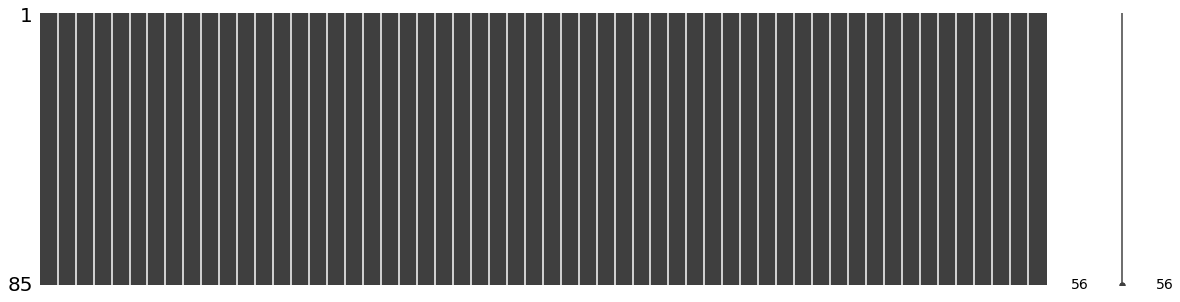

In [53]:
mno.matrix(deter_data, figsize = (20,5))


In [54]:
deter_data.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
deter_data = pd.concat([deter_data, condition_LevodopaChallengeAllTimePoints], axis = 1)

In [56]:
deter_data.groupby("Group").describe()["DetSpeed (m/s)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.711519,0.227063,0.424372,0.561829,0.636828,0.763210,1.381092
40min,17.0,0.823345,0.198039,0.609848,0.694765,0.758246,0.936891,1.278270
60min,17.0,0.929920,0.241455,0.594612,0.757860,0.886349,1.069672,1.601109
80min,17.0,0.834105,0.312307,0.044285,0.714145,0.788005,0.929967,1.547493
OFF,17.0,0.555042,0.268164,0.000000,0.478769,0.544025,0.717643,0.967739


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

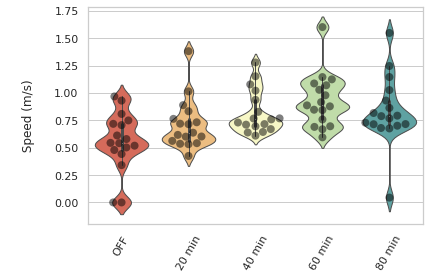

In [58]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="DetSpeed (m/s)", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSpeed (m/s)", 
                x = "Group", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Speed (m/s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [60]:
deter_data = pd.concat([patid_LevodopaChallengeAllTimePoints, deter_data], axis = 1)

In [61]:
pg.friedman(data=deter_data, dv="DetSpeed (m/s)", within="Group", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,Group,0.337024,4,22.917647,0.000132


In [62]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetSpeed (m/s)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.506710,0.240737,0.006839,0.031171
20min,0.506710,1.000000,0.071895,0.001883,0.006839
40min,0.240737,0.071895,1.000000,0.122064,0.303712
60min,0.006839,0.001883,0.122064,1.000000,0.522646
80min,0.031171,0.006839,0.303712,0.522646,1.000000


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

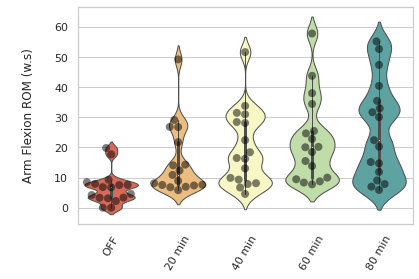

In [63]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="Detarm_flex_rom_worstside", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "Detarm_flex_rom_worstside", 
                x = "Group", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM (w.s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [64]:
pg.friedman(data=deter_data, dv="Detarm_flex_rom_worstside", within="Group", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,Group,0.413841,4,28.141176,0.000012


In [65]:
sp.posthoc_conover_friedman(a=deter_data, y_col="Detarm_flex_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.152235,0.012822,0.000313,0.000313
20min,0.152235,1.000000,0.225790,0.023478,0.024937
40min,0.012822,0.225790,1.000000,0.225790,0.225790
60min,0.000313,0.023478,0.225790,1.000000,0.915018
80min,0.000313,0.024937,0.225790,0.915018,1.000000


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

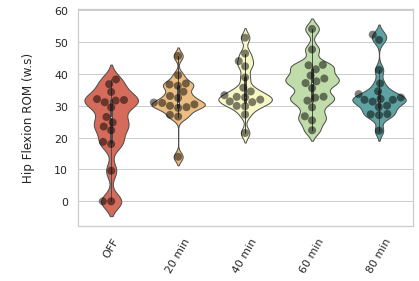

In [66]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="Dethip_flexion_rom_worstside", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "Dethip_flexion_rom_worstside", 
                x = "Group", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Flexion ROM (w.s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [67]:
pg.friedman(data=deter_data, dv="Dethip_flexion_rom_worstside", within="Group", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,Group,0.219377,4,14.917647,0.004875


In [68]:
sp.posthoc_conover_friedman(a=deter_data, y_col="Dethip_flexion_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.360048,0.054777,0.007627,0.114850
20min,0.360048,1.000000,0.280860,0.054777,0.376189
40min,0.054777,0.280860,1.000000,0.360048,0.669699
60min,0.007627,0.054777,0.360048,1.000000,0.277125
80min,0.114850,0.376189,0.669699,0.277125,1.000000




---

**Inputing using K-Nearest Neighbors**

*Exploratory, won't be employed*


---





In [24]:
LevodopaChallengeAllTimePoints = pd.read_csv('LevodopaChallengeAllTimePoints.csv', sep = ';')

In [25]:
# Remove patient index

patid_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,0:1]



In [26]:
# Remove condition label

condition_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,57:58]



In [27]:

LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,1:57]


In [11]:
imputer = KNNImputer(n_neighbors=3)


In [12]:
imputed = imputer.fit_transform(LevodopaChallengeAllTimePoints)


In [13]:
imputed

array([[6.11468798e-01, 1.14268519e+02, 5.23822383e-01, ...,
        1.06100943e-01, 2.31412620e-02, 5.24081060e-02],
       [5.18246892e-01, 9.26219991e+01, 6.16190476e-01, ...,
        2.52852767e-01, 8.15877060e-02, 1.86010943e-01],
       [7.17643259e-01, 1.20639756e+02, 5.08088235e-01, ...,
        6.36522870e-02, 2.16415710e-02, 4.53732760e-02],
       ...,
       [7.78075522e-01, 1.08863734e+02, 5.27477021e-01, ...,
        1.95360234e-01, 1.21780121e-01, 7.91486248e-02],
       [7.78075522e-01, 1.08863734e+02, 5.27477021e-01, ...,
        1.95360234e-01, 1.21780121e-01, 7.91486248e-02],
       [7.28150000e-01, 1.05942280e+02, 5.57690000e-01, ...,
        9.63271303e-01, 3.05479700e-02, 5.65806900e-02]])

In [15]:
df_imputed = pd.DataFrame(imputed, columns=LevodopaChallengeAllTimePoints.columns)

In [16]:
df_imputed

,Speed (m/s),Cadence (steps/min),Step Time - worst side (s)2,Step Length - worst side (m)2,Stride Time (s),Stride Length (m),Step Width (m),Stance Time - worst time t (s)2,Swing Time - worst side (s)2,Double Support Time (s),...,CV Step time,Cv Step Width,CV Stride Time,Cv Stride Lenght,CV Double Support,CV Stance Fraction,Step Time Asymetry N,Step lenght AsymetryN,Stance Time Asymetry N,Swing Time Asymetry N
0,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,0.399191,...,0.050294,0.173002,0.034927,0.133088,0.064845,0.025515,0.005713,0.106101,0.023141,0.052408
1,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,0.515325,...,0.196615,0.443050,0.076291,0.309330,0.162151,0.051773,0.107760,0.252853,0.081588,0.186011
2,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,0.349257,...,0.137963,0.403884,0.102456,0.226720,0.177430,0.031323,0.044568,0.063652,0.021642,0.045373
3,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,0.392701,...,0.028828,0.329662,0.024560,0.127313,0.105754,0.016734,0.077761,0.209073,0.029428,0.059760
4,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,0.432020,...,0.044448,0.181974,0.406887,0.095313,0.106603,0.027155,0.383606,0.047893,0.185206,0.331235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.675777,105.494506,0.601471,0.399731,1.137766,0.800632,0.325380,0.747505,0.390261,0.402606,...,0.125636,0.261770,0.083390,0.275369,0.211724,0.053054,0.112768,0.104086,0.051326,0.106259
81,0.778076,108.863734,0.527477,0.403020,1.058489,0.845717,0.174431,0.709058,0.349029,0.369310,...,0.073447,0.308789,0.066083,0.147806,0.154951,0.039313,0.047207,0.195360,0.121780,0.079149
82,0.778076,108.863734,0.527477,0.403020,1.058489,0.845717,0.174431,0.709058,0.349029,0.369310,...,0.073447,0.308789,0.066083,0.147806,0.154951,0.039313,0.047207,0.195360,0.121780,0.079149
83,0.778076,108.863734,0.527477,0.403020,1.058489,0.845717,0.174431,0.709058,0.349029,0.369310,...,0.073447,0.308789,0.066083,0.147806,0.154951,0.039313,0.047207,0.195360,0.121780,0.079149


In [17]:
df_imputed = pd.concat([patid_LevodopaChallengeAllTimePoints, df_imputed], axis = 1)

In [19]:
df_imputed = pd.concat([df_imputed, condition_LevodopaChallengeAllTimePoints], axis = 1)

In [ ]:
df_imputed

In [21]:
df_imputed.to_csv('output_knn.csv', encoding = 'utf-8-sig') 
files.download('output_knn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>